In [12]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [13]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file = "./Resources/lending_data.csv"
df = pd.read_csv(file)
# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [14]:
df.keys()

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [15]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
X = df.drop(columns=['loan_status'])

In [17]:
# Review the y variable Series
y.sample(10)

24444    0
63159    0
52572    0
14129    0
56476    0
4571     0
55455    0
2850     0
28547    0
1164     0
Name: loan_status, dtype: int64

In [18]:
# Review the X variable DataFrame
X.sample(10)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
35702,7700.0,6.401,40800,0.264706,2,0,10800
39042,11700.0,8.111,56900,0.472759,6,1,26900
65418,11400.0,7.973,55600,0.460432,5,1,25600
61471,9400.0,7.113,47500,0.368421,3,0,17500
32355,10000.0,7.371,50000,0.400000,4,0,20000
32085,9600.0,7.194,48300,0.378882,4,0,18300
25823,10200.0,7.454,50700,0.408284,4,1,20700
53518,9300.0,7.098,47400,0.367089,3,0,17400
37918,7800.0,6.447,41300,0.273608,2,0,11300
66065,8700.0,6.840,45000,0.333333,3,0,15000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [19]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [21]:
# Split the data using train_test_split # Assign a random_state of 1 to the function

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)



---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [23]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
log_model = LogisticRegression(random_state=1)
# Fit the model using training data
log_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [26]:
# Make a prediction using the testing data
#training_predictions = log_model.predict(X_train)
y_pred = log_model.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [30]:
# Print the balanced_accuracy score of the model
ba = balanced_accuracy_score(y_test, y_pred)
f'Balanced accuracy score is {round(ba,4)}'

'Balanced accuracy score is 0.9443'

In [32]:
# Generate a confusion matrix for the model
training_matrix = confusion_matrix(y_test, y_pred)
print(training_matrix)

[[18679    80]
 [   67   558]]


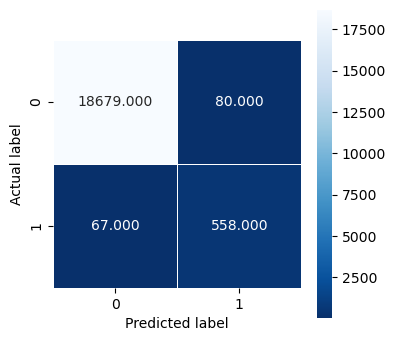

In [57]:
# confusion matrix visually
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');



In [35]:
# Print the classification report for the model
training_report = classification_report(y_test, y_pred)
print(training_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.89      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [38]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# Assign a random_state parameter of 1 to the model
resample_model = RandomOverSampler(random_state = 1)
# Fit the original training data to the random_oversampler model
X_resample, y_resample = resample_model.fit_resample(X_train, y_train)

In [39]:
# Count the distinct values of the resampled labels data
X_resample.value_counts()
y_resample.value_counts()

0    56277
1    56277
Name: loan_status, dtype: int64

In [40]:
X_resample.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,8500.0,6.722,43900,0.316629,3,0,13900
1,10000.0,7.360,49900,0.398798,4,0,19900
2,8400.0,6.708,43700,0.313501,3,0,13700
3,11000.0,7.779,53800,0.442379,5,1,23800
4,8900.0,6.924,45800,0.344978,3,0,15800


### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [43]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
resample_random_model = LogisticRegression(random_state = 1)


# Fit the model using the resampled training data
resample_random_model.fit(X_resample, y_resample)

# Make a prediction using the testing data
y_pred_resample = resample_random_model.predict(X_test)
# display both values
results_resample = pd.DataFrame({"Prediction": y_pred_resample, "Actual": y_test}).reset_index(drop=True)
results_resample.head()

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [44]:
# Print the balanced_accuracy score of the model 
ba_resample= balanced_accuracy_score(y_test, y_pred_resample)
f'Balanced accuracy score is {round(ba_resample,4)}'

'Balanced accuracy score is 0.996'

In [45]:
# Generate a confusion matrix for the model
print(confusion_matrix(y_test, y_pred_resample))

[[18668    91]
 [    2   623]]


In [46]:
# Print the classification report for the model
print(classification_report(y_test, y_pred_resample))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      1.00      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      1.00      0.96     19384
weighted avg       1.00      1.00      1.00     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 